In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("data/Temp_NWPP_10yrs.csv")

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df.head(20)

,datetime,siteid,station_name,region,timezone,temperature,temperature_avg
0,2016-01-01 00:00:00,CYVR,Vancouver,NWPP,America/Vancouver,34.0,30.0
1,2016-01-01 00:00:00,KBIL,Billings,NWPP,America/Denver,22.0,23.5
2,2016-01-01 00:00:00,KBOI,Boise,NWPP,America/Boise,20.0,11.0
3,2016-01-01 00:00:00,KEUG,Eugene,NWPP,America/Los_Angeles,41.0,33.0
4,2016-01-01 00:00:00,KGEG,Spokane,NWPP,America/Los_Angeles,19.0,10.5
5,2016-01-01 00:00:00,KGTF,Great Falls,NWPP,America/Denver,23.0,17.0
6,2016-01-01 00:00:00,KLMT,Klamath Falls,NWPP,America/Los_Angeles,15.0,4.0
7,2016-01-01 00:00:00,KMFR,Medford,NWPP,America/Los_Angeles,43.0,34.0
8,2016-01-01 00:00:00,KPDT,Pendleton,NWPP,America/Los_Angeles,24.0,20.5
9,2016-01-01 00:00:00,KPDX,Portland,NWPP,America/Los_Angeles,37.0,34.0


In [5]:
df[df['station_name']=='NWPP']

,datetime,siteid,station_name,region,timezone,temperature,temperature_avg
15,2016-01-01 00:00:00,NWPP,NWPP,NWPP,NaN,32.0,27.5
31,2016-01-01 01:00:00,NWPP,NWPP,NWPP,NaN,30.0,NaN
47,2016-01-01 02:00:00,NWPP,NWPP,NWPP,NaN,29.0,NaN
63,2016-01-01 03:00:00,NWPP,NWPP,NWPP,NaN,28.0,NaN
79,2016-01-01 04:00:00,NWPP,NWPP,NWPP,NaN,27.0,NaN
...,...,...,...,...,...,...,...
1358703,2025-09-08 06:00:00,NWPP,NWPP,NWPP,NaN,67.0,NaN
1358719,2025-09-08 07:00:00,NWPP,NWPP,NWPP,NaN,66.0,NaN
1358735,2025-09-08 08:00:00,NWPP,NWPP,NWPP,NaN,65.0,NaN
1358751,2025-09-08 09:00:00,NWPP,NWPP,NWPP,NaN,64.0,NaN


In [ ]:
# df['datetime'] = df['datetime'] - pd.Timedelta(hours=7)

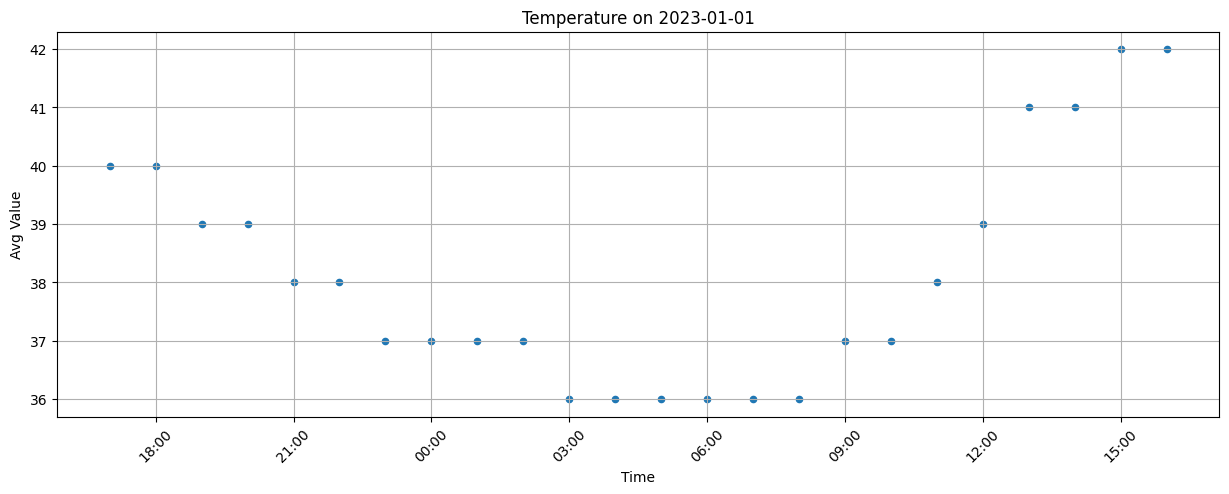

In [10]:
#plot avgvalue vs time of datetime column for a particular date in datetime column
plot_df = df[(df['station_name']=='NWPP') & (df['datetime'] >= '2025-01-01') & (df['datetime'] < '2025-01-02')].copy()
plot_df['datetime'] = plot_df['datetime'] - pd.Timedelta(hours=7)
plot_df.plot.scatter(x='datetime', y='temperature', figsize=(15, 5), title='Temperature on 2023-01-01')
plt.xlabel("Time")
plt.ylabel("Avg Value")
plt.xticks(rotation=45)
import matplotlib.dates as mdates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid(True)
plt.show()


In [ ]:


names = df['name'].unique()
#subtract 7 hours from datetime to convert from UTC to PST
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'] - pd.Timedelta(hours=7)
df['date'] = df['datetime'].dt.date